In [26]:
import pandas as pd

print("Reading data.....")
pro_russian_data = pd.read_csv('./data/pro-russian.csv')
not_pro_russian_data = pd.read_csv('./data/not-pro-russian.csv')
print('    DONE.')


# pro_russian_label = 1
# not_pro_russian_label = 0
pro_russian_data['label'] = 1
not_pro_russian_data['label'] = 0
pro_russian_data.head()

Reading data.....
    DONE.


,story_id,publisher,publication_date,ingest_date,headline,raw_text,core_of_text,xml_text,status,source,canonical_publisher_id,factiva_accession_no,source_name,source_code,propaganda_classifier_result,label
0,34460278,RIA Novosti,2014-05-06,2014-05-12,PACE Chief Says Ukraine Crisis Should be Prior...,"MOSCOW, May 6 (RIA Novosti) - The Council of E...","MOSCOW, May 6 (RIA Novosti) - The Council of E...","<?xml version=""1.0"" encoding=""UTF-8""?>\n<story...",NaN,Release187,167,RVESEN0020140506ea56006k5,RIA Novosti,RVESEN,1,1
1,34460804,RIA Novosti,2014-05-06,2014-05-12,Ukraine’s Donetsk and Luhansk Regions Will Boy...,"MOSCOW, May 6 (RIA Novosti) – Residents of Ukr...","MOSCOW, May 6 (RIA Novosti) – Residents of Ukr...","<?xml version=""1.0"" encoding=""UTF-8""?>\n<story...",NaN,Release187,167,RVESEN0020140506ea56005pl,RIA Novosti,RVESEN,1,1
2,34462377,RIA Novosti,2014-05-06,2014-05-12,Anti-Coup Protesters to Rally in Odessa Despit...,"Vadim Savenko\nMOSCOW, May 6 (RIA Novosti) - O...","Vadim Savenko\nMOSCOW, May 6 (RIA Novosti) - V...","<?xml version=""1.0"" encoding=""UTF-8""?>\n<story...",NaN,Release187,167,RVESEN0020140506ea56002pb,RIA Novosti,RVESEN,1,1
3,34462777,RIA Novosti,2014-05-06,2014-05-12,"New Ships, Subs to Boost Russia’s Black Sea Fl...",Russian Defense Minister Sergei Shoigu\nMOSCOW...,Russian Defense Minister Sergei Shoigu\nMOSCOW...,"<?xml version=""1.0"" encoding=""UTF-8""?>\n<story...",NaN,Release187,167,RVESEN0020140506ea560025v,RIA Novosti,RVESEN,1,1
4,34462963,RIA Novosti,2014-05-06,2014-05-12,Ukrainian Party Demands Resignation of Acting ...,"MOSCOW, May 6 (RIA Novosti) – Ukraine’s Party ...","MOSCOW, May 6 (RIA Novosti) – Ukraine’s Party ...","<?xml version=""1.0"" encoding=""UTF-8""?>\n<story...",NaN,Release187,167,RVESEN0020140506ea56001me,RIA Novosti,RVESEN,1,1


In [27]:
def get_length(text):
    n = len(text.split())
    return n

In [32]:
cols_to_keep = ['story_id', 'raw_text', 'label']
pro_russian_data = pro_russian_data[cols_to_keep]
print('length of pro_russian_data:', len(pro_russian_data))
pro_russian_data['len'] = pro_russian_data['raw_text'].apply(get_length) 
# print(pro_russian_data.groupby(['len']).count())

not_pro_russian_data = not_pro_russian_data[cols_to_keep]
print('length of not_pro_russian_data:', len(not_pro_russian_data))
not_pro_russian_data['len'] = not_pro_russian_data['raw_text'].apply(get_length)
not_pro_russian_data_sample=not_pro_russian_data.sample(n=5244, replace=True, random_state=1)
print('sampled data:', len(not_pro_russian_data_sample))
# not_pro_russian_data.head()

frames = [pro_russian_data, not_pro_russian_data_sample]
df = pd.concat(frames)
print(len(df))

length of pro_russian_data: 5244
length of not_pro_russian_data: 22064
sampled data: 5244
10488


Text(0, 0.5, '# of comments')

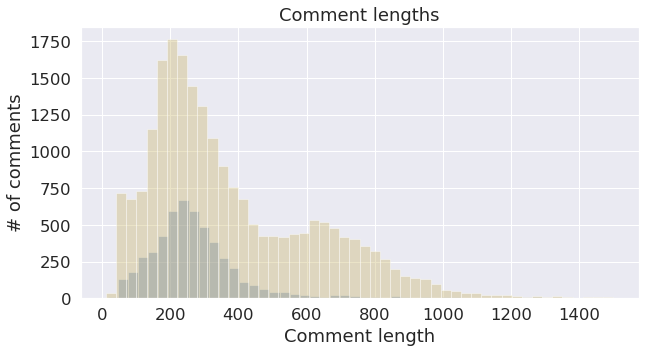

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = (10,5)

# Truncate any comment lengths greater tahn 512.
lengths_pro_russian_data = pro_russian_data.len.to_numpy()
lengths_pro_russian_data = lengths_pro_russian_data[lengths_pro_russian_data<1500]

legth_not_pro_russian_data = not_pro_russian_data.len.to_numpy()
legth_not_pro_russian_data = legth_not_pro_russian_data[legth_not_pro_russian_data<1500]

# Plot the distribution of comment lengths.
sns.distplot(lengths_pro_russian_data, kde=False, rug=False)
sns.distplot(legth_not_pro_russian_data, kde=False, rug=False, color='y')
plt.title('Comment lengths')
plt.xlabel('Comment length')
plt.ylabel ('# of comments')

In [34]:
def clean_tweets(tweet):

    tweet = (tweet.encode("ascii", errors="ignore").decode()).lower()
    tweet = tweet.replace("\n", " ")
    tweet = tweet.replace("\r", " ")
    return tweet


In [35]:
df['raw_text'] = df.raw_text.apply(clean_tweets)

In [36]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20, random_state=42, shuffle=True)
print('train counts:', train.groupby('label').count())
print('test counts:', test.groupby('label').count())

train counts:        story_id  raw_text   len
label                          
0          4208      4208  4208
1          4182      4182  4182
test counts:        story_id  raw_text   len
label                          
0          1036      1036  1036
1          1062      1062  1062


In [37]:
import os
if not os.path.exists('./data/'):
    os.mkdir('./data/')
data_dir = './data/'    
# determine the path where to save the train and test file
train_path = data_dir + 'train.tsv'
test_path = data_dir + 'test.tsv'

# save the train and test file
# again using the '\t' separator to create tab-separated-values files
train.to_csv(train_path, sep='\t', index=False)
test.to_csv(test_path, sep='\t', index=False)